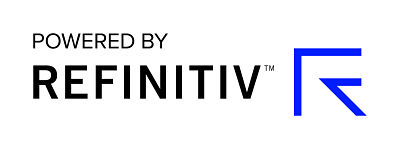


<center>
    <h3></h3>
    <h1> Mountain View Color from Solve & Empirisign</h1>
</center>

<center>
    <b>Gabriel Esquivel, Research Analyst</b>
</center>

<center>
    <i>April 2020</i>
</center>

In [1]:
import pandas as pd 
import os
import glob
import numpy as np
pd.options.mode.chained_assignment = None

## **<span style="color:blue">Import MV Prices & Spliting between ABS, CMBS and RMBS</span>**

In [2]:
os.chdir(r"C:\Users\u6075486\Desktop\MBS COLOR\MV daily")
extension = 'csv'
all_filenames = [i for 
                 i in glob.glob('*.{}'.format(extension))]
MV_LastPx= pd.concat([pd.read_csv(f) for f in 
                      all_filenames], sort = True)
MV_LastPx1 = MV_LastPx.loc[:, ["cusip",
                               "MV Bid Price", 
                              "Asset_Class", "Pricing Method Value (bps)"]]

MV_LastPx1.head()

,cusip,MV Bid Price,Asset_Class,Pricing Method Value (bps)
0,00436MAA3,101.2018,ABS,300
1,00436MAB1,98.0402,ABS,500
2,000759CF5,97.3267,HE1,430
3,00841UAP1,99.5213,HE1,325
4,00842CAC9,100.3074,HE1,265


### **<span style="color:blue">ABS Cusips</span>**

In [3]:
ABS_Cusips=MV_LastPx1.loc[(MV_LastPx1.Asset_Class == 'ABS')]
ABS_Cusips.head()

,cusip,MV Bid Price,Asset_Class,Pricing Method Value (bps)
0,00436MAA3,101.2018,ABS,300
1,00436MAB1,98.0402,ABS,500
5,00081WAH4,95.3148,ABS,265
6,02529HAL4,103.0461,ABS,325
7,02530AAG7,101.3311,ABS,5


### **<span style="color:blue">CMBS Cusips</span>**

In [4]:
CMBS_Cusips=MV_LastPx1.loc[(MV_LastPx1.Asset_Class == 'CMBS')]
CMBS_Cusips.head()

,cusip,MV Bid Price,Asset_Class,Pricing Method Value (bps)
23,00109BAA3,100.4971,CMBS,275
53,07324SAF9,96.3718,CMBS,240
54,07324SAG7,94.7853,CMBS,345
55,07324SAH5,98.7248,CMBS,370
56,07324SAK8,3.6327,CMBS,800


### **<span style="color:blue">RMBS Cusips</span>**

In [5]:
RMBS_Cusips=MV_LastPx1.loc[(MV_LastPx1.Asset_Class != 'ABS') & (MV_LastPx1.Asset_Class != 'CMBS') ]
RMBS_Cusips.head()

,cusip,MV Bid Price,Asset_Class,Pricing Method Value (bps)
2,000759CF5,97.3267,HE1,430
3,00841UAP1,99.5213,HE1,325
4,00842CAC9,100.3074,HE1,265
21,00105HED4,87.5956,HE1,275
22,00105HEE2,87.9952,HE1,390


## **<span style="color:blue">Mountain View Portfolio</span>**

In [6]:
os.chdir(r"C:\Users\u6075486\Desktop\MBS COLOR\MV Consumption")
extension = 'csv'
all_filenames = [i for 
                 i in glob.glob('*.{}'.format(extension))]
MV_Cusips= pd.concat([pd.read_csv(f) for f in 
                      all_filenames], sort = True)
MV_Cusips.head()

,cusip
0,00436MAA3
1,00436MAB1
2,000759CF5
3,00841UAP1
4,00842CAC9


## **<span style="color:blue">Import Empirisign Color</span>**

In [7]:
os.chdir(r"C:\Users\u6075486\Desktop\MBS COLOR\Empirisign")
extension = 'csv'
all_filenames = [i for 
                 i in glob.glob('*.{}'.format(extension))]
Color_Empirisign= pd.concat([pd.read_csv(f) for f in 
                             all_filenames], sort = True)
Color_Empirisign1=Color_Empirisign.loc[:, ["cusip","of","cf","settle_dt","spread","price32"]]
Color_Empirisign1.loc[(Color_Empirisign1.of >= 0.75)]
Color_Empirisign1.head()

,cusip,of,cf,settle_dt,spread,price32
0,00436MAB1,0.405,0.20604,2021-06-04,NaN,NaN
1,006346AU4,1.355,1.35500,2021-06-04,NaN,NaN
2,006346AU4,1.355,1.35500,2021-06-04,370,NaN
3,05377RDC5,23.500,23.50000,2021-06-04,35,NaN
4,05377RDC5,23.500,23.50000,2021-06-04,low mid 30s,NaN


### **<span style="color:blue">Merge between Empirisign Color and MV Comsuption</span>**

In [8]:
Color_Merged = MV_Cusips.merge(Color_Empirisign1, 
                               on='cusip', 
                               how = "inner")
Final_Color_Empirisign = Color_Merged.drop_duplicates(subset="cusip", 
                                                      keep="last")



Final_Color_Empirisign.dropna(subset=['price32','spread'])

Final_Color_Empirisign1 = Final_Color_Empirisign.dropna(subset=['price32','spread'])

Final_Color_Empirisign1.head()

,cusip,of,cf,settle_dt,spread,price32
18,00217EAC2,0.866,0.678847,2021-06-07,6,100-191
35,12594TAD5,0.179,0.068030,2021-06-04,35,100-25
67,29373LAC5,0.982,0.846582,2021-06-03,7,100-114
71,29374WAB2,9.780,6.245990,2021-06-03,6,101-142
75,29373KAB9,0.650,0.494724,2021-06-03,9,101-14


## **<span style="color:blue">MV Color from Empirisign (Adding MV last price)</span>** 
<!-- blank line -->
----
<!-- blank line -->

### **<span style="color:blue">Adding MV last price & Spread</span>** 

In [9]:
MV_Empirisign= Final_Color_Empirisign1.merge(MV_LastPx1, 
                               on='cusip', 
                               how = "inner")
MV_Empirisign

,cusip,of,cf,settle_dt,spread,price32,MV Bid Price,Asset_Class,Pricing Method Value (bps)
0,00217EAC2,0.866,0.678847,2021-06-07,6,100-191,100.6607,ABS,145
1,12594TAD5,0.179,0.068030,2021-06-04,35,100-25,100.4472,ABS,40
2,29373LAC5,0.982,0.846582,2021-06-03,7,100-114,100.7101,ABS,65
3,29374WAB2,9.780,6.245990,2021-06-03,6,101-142,101.3573,ABS,5
4,29373KAB9,0.650,0.494724,2021-06-03,9,101-14,101.2757,ABS,15
5,36258HAC9,10.000,10.000000,2021-06-04,20,102-06,102.2314,ABS,50
6,361886CD4,10.000,10.000000,2021-06-03,8,106-277,106.8631,ABS,5
7,88576XAB2,0.600,0.236866,2021-06-07,115,121H,117.6617,ABS,150
8,58940BAA4,4.320,4.320000,2021-06-08,108,100-14,99.9754,ABS,130
9,68784AAE6,0.625,0.373037,2021-06-03,20,101H,101.1923,ABS,40


### **<span style="color:blue">Reorder the columns & getting percent change between prices</span>**

In [10]:
column_names = ["cusip", "of", 
                "cf","settle_dt",
                "price32","MV Bid Price"]
MV_Empirisign = MV_Empirisign.reindex(columns=column_names)
MV_Empirisign1= MV_Empirisign.drop_duplicates(subset="cusip", keep="last")
MV_Empirisign1
MV_Empirisign1 = MV_Empirisign1[MV_Empirisign1.price32 != " "]
MV_Empirisign1

,cusip,of,cf,settle_dt,price32,MV Bid Price
0,00217EAC2,0.866,0.678847,2021-06-07,100-191,100.6607
1,12594TAD5,0.179,0.068030,2021-06-04,100-25,100.4472
2,29373LAC5,0.982,0.846582,2021-06-03,100-114,100.7101
3,29374WAB2,9.780,6.245990,2021-06-03,101-142,101.3573
4,29373KAB9,0.650,0.494724,2021-06-03,101-14,101.2757
5,36258HAC9,10.000,10.000000,2021-06-04,102-06,102.2314
6,361886CD4,10.000,10.000000,2021-06-03,106-277,106.8631
7,88576XAB2,0.600,0.236866,2021-06-07,121H,117.6617
8,58940BAA4,4.320,4.320000,2021-06-08,100-14,99.9754
9,68784AAE6,0.625,0.373037,2021-06-03,101H,101.1923


## **<span style="color:blue">Import Solve Color</span>**

In [11]:
os.chdir(r"C:\Users\u6075486\Desktop\MBS COLOR\Solve Color")
extension = 'csv'
all_filenames = [i for
                 i in glob.glob('*.{}'.format(extension))]
Color_Solve = pd.concat([pd.read_csv(f) for 
                         f in all_filenames], sort = True)

### **<span style="color:blue">Merge between Solve Color and MV Comsuption</span>**

In [12]:
Solve_Merged = MV_Cusips.merge(Color_Solve, 
                               on='cusip', 
                               how = "inner")
Solve_Rd = Solve_Merged.loc[:, ["cusip","Asset Class","Name","Date","Value","Type","Px\Spr\Yld","O Face","Last Px","Last Sprd","Trd","High Yield Provider","Provider"]]
Solve_Rd

,cusip,Asset Class,Name,Date,Value,Type,Px\Spr\Yld,O Face,Last Px,Last Sprd,Trd,High Yield Provider,Provider
0,00436MAA3,ABS CDO,AALLC 2018-1 A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00436MAB1,ABS CDO,AALLC 2018-1 B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000759CF5,RMBS,ABFS 2002-1 A5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00841UAP1,RMBS,ABMT 2014-2 A14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00842CAC9,RMBS,ABMT 2015-7 A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15251,974153AB4,Other ABS,WSTOP 2020-1A A2,3/15/2021,162.5,PX TALK,SPREAD,1000000.0,103.0,135.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (B)
15252,974153AB4,Other ABS,WSTOP 2020-1A A2,3/15/2021,150.0,PX TALK,SPREAD,1000000.0,103.0,135.0,NaN,Solve Tier High Yield 2,Solve Tier 1 (A)
15253,974153AB4,Other ABS,WSTOP 2020-1A A2,3/9/2021,160.0,BID,SPREAD,5000000.0,103.0,135.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A)
15254,974153AB4,Other ABS,WSTOP 2020-1A A2,3/4/2021,160.0,BID,SPREAD,5000000.0,103.0,135.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A)


## **<span style="color:blue">MV Color from Solve</span>** 
<!-- blank line -->
----
<!-- blank line -->

### **<span style="color:blue">Filtered by date - Last five days</span>** 

In [13]:
Solve_Rd1 = Solve_Rd.dropna(subset=['Date'])
Solve_Rd1["Date"] = pd.to_datetime(Solve_Rd1.Date)
ts = pd.to_datetime('05/31/2021')
Solve_Filtered = Solve_Rd1.loc[Solve_Rd1.Date >= ts,:]
Solve_Filtered.drop_duplicates(subset="cusip",keep="last").head()

,cusip,Asset Class,Name,Date,Value,Type,Px\Spr\Yld,O Face,Last Px,Last Sprd,Trd,High Yield Provider,Provider
150,006346AS9,Other ABS,ADMSO 2018-1 A,2021-06-03,180.0,BID,SPREAD,5000000.0,NaN,180.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A)
165,006346AU4,Other ABS,ADMSO 2018-1 B,2021-06-02,370.0,OFFER,SPREAD,1355000.0,NaN,370.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A)
207,05377RDC5,Rental Car,AESOP 2018-2A A,2021-06-01,24.0,OFFER,SPREAD,1575000.0,108.50,30.0,NaN,Solve Tier High Yield 2,Solve Tier 1 (A)
590,03464VAA2,RMBS,AOMT 2019-6 A1,2021-06-01,101.0,OFFER,PRICE,1800000.0,101.00,171.0,NaN,Solve Tier High Yield 2,Solve Tier 1 (A)
609,00217EAC2,Auto Lease,ARIFL 2018-A A3,2021-06-03,17.0,COVER,SPREAD,866000.0,100.59,6.0,NaN,Solve Tier High Yield 2,Solve Tier 1 (A)


## **<span style="color:blue">ABS Criteria</span>** 
<!-- blank line -->
----
<!-- blank line -->

### **<span style="color:blue">ABS Color from Solve</span>**

In [14]:
ABS_Solve= ABS_Cusips.merge(Solve_Filtered, 
                               on='cusip', 
                               how = "inner")

### **<span style="color:blue">ABS by Offer</span>**

In [15]:
ABS_OFFER=ABS_Solve.loc[(ABS_Solve.Type== 'OFFER')]
ABS_OFFER_PRICE1 =ABS_OFFER.loc[ABS_OFFER["Px\Spr\Yld"]=="PRICE"]
ABS_OFFER_PRICE2=ABS_OFFER_PRICE1.loc[(ABS_OFFER_PRICE1["High Yield Provider"]=="Solve Tier High Yield 1") | (ABS_OFFER_PRICE1["High Yield Provider"]=="Solve Tier High Yield 2")]


ABS_OFFER_PRICE2['Percent_Change_Price'] = ((ABS_OFFER_PRICE2['MV Bid Price']) / (ABS_OFFER_PRICE2['Last Px'])-1)*100
ABS_OFFER_PRICE3=ABS_OFFER_PRICE2.loc[:, ["cusip","Asset_Class","Name","Date","O Face", "Type","Px\Spr\Yld","High Yield Provider","Provider","MV Bid Price","Last Px","Percent_Change_Price"]]
ABS_OFFER_PRICE3.head()

# Percent change

ABS_OFFER_PRICE4 = ABS_OFFER_PRICE3.loc[(ABS_OFFER_PRICE3.Percent_Change_Price >= 3) | (ABS_OFFER_PRICE3.Percent_Change_Price <= -3)]

#  Size

ABS_OFFER_PRICE5= ABS_OFFER_PRICE4.loc[(ABS_OFFER_PRICE4["O Face"] >= 750000)]

ABS_OFFER_PRICE5.drop_duplicates(subset="cusip", keep="last")

ABS_OFFER_PRICE5.head()

,cusip,Asset_Class,Name,Date,O Face,Type,Px\Spr\Yld,High Yield Provider,Provider,MV Bid Price,Last Px,Percent_Change_Price


### **<span style="color:blue">ABS by Color</span>**

In [16]:
ABS_COLOR=ABS_Solve.loc[(ABS_Solve.Type== 'COLOR')]
ABS_COLOR_PRICE1 =ABS_COLOR.loc[ABS_COLOR["Px\Spr\Yld"]=="PRICE"]
ABS_COLOR_PRICE2=ABS_COLOR_PRICE1.loc[(ABS_COLOR_PRICE1["High Yield Provider"]=="Solve Tier High Yield 1") | (ABS_COLOR_PRICE1["High Yield Provider"]=="Solve Tier High Yield 2")]

ABS_COLOR_PRICE2['Percent_Change_Price'] = ((ABS_COLOR_PRICE2['MV Bid Price']) / (ABS_COLOR_PRICE2['Last Px'])-1)*100
ABS_COLOR_PRICE3=ABS_COLOR_PRICE2.loc[:, ["cusip","Asset_Class","Name","Date","O Face", "Type","Px\Spr\Yld","High Yield Provider","Provider","MV Bid Price","Last Px","Percent_Change_Price"]]
ABS_COLOR_PRICE3.head()

,cusip,Asset_Class,Name,Date,O Face,Type,Px\Spr\Yld,High Yield Provider,Provider,MV Bid Price,Last Px,Percent_Change_Price
316,38218QAA8,ABS,GOODG 2017-2A A,2021-06-02,NaN,COLOR,PRICE,Solve Tier High Yield 2,Solve Tier 2 (I),103.6726,103.5,0.166763
317,38218QAA8,ABS,GOODG 2017-2A A,2021-06-02,9000000.0,COLOR,PRICE,Solve Tier High Yield 2,Solve Tier 2 (I),103.6726,103.5,0.166763
319,38218QAA8,ABS,GOODG 2017-2A A,2021-06-02,NaN,COLOR,PRICE,Solve Tier High Yield 2,Solve Tier 2 (F),103.6726,103.5,0.166763
543,83162CG98,ABS,SBAP 2020-25I 1,2021-06-04,10000000.0,COLOR,PRICE,Solve Tier High Yield 1,Solve Tier 1 (A),97.7715,98.2,-0.436354
546,83162CG98,ABS,SBAP 2020-25I 1,2021-06-04,10000000.0,COLOR,PRICE,Solve Tier High Yield 1,Solve Tier 1 (A),97.7715,98.2,-0.436354


### **<span style="color:blue">ABS by BID</span>**

In [17]:
ABS_BID=ABS_Solve.loc[(ABS_Solve.Type== 'BID')]

### **<span style="color:blue">BID & PX/Sprd/Yld</span>**

In [18]:
ABS_BID_PRICE =ABS_BID.loc[ABS_BID["Px\Spr\Yld"]=="PRICE"]

ABS_BID_PRICE2=ABS_BID_PRICE.loc[(ABS_BID_PRICE["High Yield Provider"]=="Solve Tier High Yield 1") | (ABS_BID_PRICE["High Yield Provider"]=="Solve Tier High Yield 2")]

ABS_BID_PRICE2['Percent_Change_Price'] = ((ABS_BID_PRICE2['MV Bid Price']) / (ABS_BID_PRICE2['Last Px'])-1)*100
ABS_BID_PRICE3=ABS_BID_PRICE2.loc[:, ["cusip","Asset_Class","Name","Date","O Face", "Type","Px\Spr\Yld","High Yield Provider","Provider","MV Bid Price","Last Px","Percent_Change_Price"]]

ABS_BID_PRICE3.head()

,cusip,Asset_Class,Name,Date,O Face,Type,Px\Spr\Yld,High Yield Provider,Provider,MV Bid Price,Last Px,Percent_Change_Price
47,078768AD0,ABS,BMIR 2018-1A M1B,2021-06-04,10000000.0,BID,PRICE,Solve Tier High Yield 1,Solve Tier 1 (A),99.9330,100.5,-0.564179
49,078768AD0,ABS,BMIR 2018-1A M1B,2021-06-02,10000000.0,BID,PRICE,Solve Tier High Yield 1,Solve Tier 1 (A),99.9330,100.5,-0.564179
51,078768AD0,ABS,BMIR 2018-1A M1B,2021-06-01,10000000.0,BID,PRICE,Solve Tier High Yield 1,Solve Tier 1 (A),99.9330,100.5,-0.564179
53,07877TAC5,ABS,BMIR 2018-3A M2,2021-06-04,3000000.0,BID,PRICE,Solve Tier High Yield 1,Solve Tier 1 (A),100.5504,100.5,0.050149
55,07877TAC5,ABS,BMIR 2018-3A M2,2021-06-02,3000000.0,BID,PRICE,Solve Tier High Yield 1,Solve Tier 1 (A),100.5504,100.5,0.050149


### **<span style="color:blue">BID & SPR</span>**

In [19]:
ABS_BID_SPREAD=ABS_BID.loc[ABS_BID["Px\Spr\Yld"]=="SPREAD"]

ABS_BID_SPREAD['MV Spread'] = ABS_BID_SPREAD['Pricing Method Value (bps)'].astype(float)

ABS_BID_SPREAD

,cusip,MV Bid Price,Asset_Class,Pricing Method Value (bps),Asset Class,Name,Date,Value,Type,Px\Spr\Yld,O Face,Last Px,Last Sprd,Trd,High Yield Provider,Provider,MV Spread
0,006346AS9,105.8286,ABS,255,Other ABS,ADMSO 2018-1 A,2021-06-03,180.0,BID,SPREAD,5000000.0,NaN,180.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A),255.0
1,006346AS9,105.8286,ABS,255,Other ABS,ADMSO 2018-1 A,2021-06-03,180.0,BID,SPREAD,5000000.0,NaN,180.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A),255.0
54,07877TAC5,100.5504,ABS,245,RMBS,BMIR 2018-3A M2,2021-06-04,254.0,BID,SPREAD,3000000.0,100.50,254.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A),245.0
56,07877TAC5,100.5504,ABS,245,RMBS,BMIR 2018-3A M2,2021-06-02,254.0,BID,SPREAD,3000000.0,100.50,254.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A),245.0
58,07877TAC5,100.5504,ABS,245,RMBS,BMIR 2018-3A M2,2021-06-01,254.0,BID,SPREAD,3000000.0,100.50,254.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A),245.0
110,03789XAD0,102.9150,ABS,440,Franchise,DIN 2019-1A A2I,2021-06-03,175.0,BID,SPREAD,5000000.0,102.00,175.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A),440.0
111,03789XAE8,106.3222,ABS,330,Franchise,DIN 2019-1A A2II,2021-06-03,225.0,BID,SPREAD,5000000.0,105.75,225.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A),330.0
112,25755TAE0,105.7069,ABS,380,Franchise,DPABS 2015-1A A2II,2021-06-03,100.0,BID,SPREAD,5000000.0,105.13,100.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A),380.0
113,25755TAE0,105.7069,ABS,380,Franchise,DPABS 2015-1A A2II,2021-06-03,100.0,BID,SPREAD,5000000.0,105.13,100.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A),380.0
283,361886CD4,106.8631,ABS,5,Auto Loan,GFORT 2019-2 A,2021-06-04,15.0,BID,SPREAD,5000000.0,106.81,15.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (B),5.0


In [20]:
#Revisar estas lineas 

ABS_BID_SPREAD['Pricing Method Value (bps)'] = pd.to_numeric(ABS_BID_SPREAD['Pricing Method Value (bps)'])

ABS_BID_SPREAD['Percent_Change_Spread'] = ((ABS_BID_SPREAD['Pricing Method Value (bps)']) / (ABS_BID_SPREAD['Last Sprd'])-1)*100
ABS_BID_SPREAD1=ABS_BID_SPREAD.loc[:, ["cusip","Asset_Class","Name","Date","O Face", "Type","Px\Spr\Yld","High Yield Provider","Provider","MV Spread","Last Sprd","Percent_Change_Spread"]]
ABS_BID_SPREAD1.drop_duplicates(subset="cusip", keep="last")

ABS_BID_SPREAD2=ABS_BID_SPREAD1.loc[(ABS_BID_SPREAD1["High Yield Provider"]=="Solve Tier High Yield 1") | (ABS_BID_SPREAD1["High Yield Provider"]=="Solve Tier High Yield 2")]
ABS_BID_SPREAD2.drop_duplicates(subset="cusip", keep="last")
ABS_BID_SPREAD2.head()

,cusip,Asset_Class,Name,Date,O Face,Type,Px\Spr\Yld,High Yield Provider,Provider,MV Spread,Last Sprd,Percent_Change_Spread
0,006346AS9,ABS,ADMSO 2018-1 A,2021-06-03,5000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),255.0,180.0,41.666667
1,006346AS9,ABS,ADMSO 2018-1 A,2021-06-03,5000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),255.0,180.0,41.666667
54,07877TAC5,ABS,BMIR 2018-3A M2,2021-06-04,3000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),245.0,254.0,-3.543307
56,07877TAC5,ABS,BMIR 2018-3A M2,2021-06-02,3000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),245.0,254.0,-3.543307
58,07877TAC5,ABS,BMIR 2018-3A M2,2021-06-01,3000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),245.0,254.0,-3.543307


### **<span style="color:blue">BID & Yld</span>**

In [21]:
ABS_BID_Yld=ABS_BID.loc[ABS_BID["Px\Spr\Yld"]=="YIELD"]
ABS_BID_Yld['MV Spread'] = ABS_BID_Yld['Pricing Method Value (bps)'].astype(float)
ABS_BID_Yld['Percent_Change_Spread'] = ((ABS_BID_Yld['MV Spread']) / (ABS_BID_Yld['Last Sprd'])-1)*100
ABS_BID_Yld

ABS_BID_Yld1=ABS_BID_Yld.loc[:, ["cusip","Asset_Class","Name","Date","O Face", "Type","Px\Spr\Yld","High Yield Provider","Provider","MV Spread","Last Sprd","Percent_Change_Spread"]]
ABS_BID_Yld1.drop_duplicates()
ABS_BID_Yld2=ABS_BID_Yld1.loc[(ABS_BID_Yld1["High Yield Provider"]=="Solve Tier High Yield 1") | (ABS_BID_Yld1["High Yield Provider"]=="Solve Tier High Yield 2")]
ABS_BID_Yld2.head()

,cusip,Asset_Class,Name,Date,O Face,Type,Px\Spr\Yld,High Yield Provider,Provider,MV Spread,Last Sprd,Percent_Change_Spread


## **<span style="color:blue">Joining ABS tables</span>** 
<!-- blank line -->
----
<!-- blank line -->

### **<span style="color:blue">Concatenate Yld & Sprd</span>**

In [22]:
ABS_Color_MV = pd.merge(ABS_BID_SPREAD2, ABS_BID_Yld2, how="outer")
ABS_Color_MV1=ABS_Color_MV.drop_duplicates(subset="cusip", keep="last")
ABS_Color_MV1.head()


## Percent change 3% in absolute value

ABS_Color_MV2 = ABS_Color_MV1.loc[(ABS_Color_MV1.Percent_Change_Spread >= 3) | (ABS_Color_MV1.Percent_Change_Spread <= -3)]
ABS_Color_MV3 = ABS_Color_MV2.drop_duplicates(subset="cusip", keep="last")
ABS_Color_MV4= ABS_Color_MV3.loc[(ABS_Color_MV3["O Face"] >= 750000)]
ABS_Color_MV5= ABS_Color_MV4.loc[(ABS_Color_MV4["High Yield Provider"]=="Solve Tier High Yield 1") | (ABS_Color_MV4["High Yield Provider"]=="Solve Tier High Yield 2")]
ABS_Color_MV5

,cusip,Asset_Class,Name,Date,O Face,Type,Px\Spr\Yld,High Yield Provider,Provider,MV Spread,Last Sprd,Percent_Change_Spread
1,006346AS9,ABS,ADMSO 2018-1 A,2021-06-03,5000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),255.0,180.0,41.666667
4,07877TAC5,ABS,BMIR 2018-3A M2,2021-06-01,3000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),245.0,254.0,-3.543307
5,03789XAD0,ABS,DIN 2019-1A A2I,2021-06-03,5000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),440.0,175.0,151.428571
6,03789XAE8,ABS,DIN 2019-1A A2II,2021-06-03,5000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),330.0,225.0,46.666667
8,25755TAE0,ABS,DPABS 2015-1A A2II,2021-06-03,5000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),380.0,100.0,280.000000
13,361886CD4,ABS,GFORT 2019-2 A,2021-06-01,5000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),5.0,15.0,-66.666667
14,43284HAA7,ABS,HGVT 2019-AA A,2021-06-03,5475000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),75.0,29.0,158.620690
15,26208LAD0,ABS,HONK 2019-1A A2,2021-06-03,5000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),325.0,185.0,75.675676
16,53948KAA7,ABS,LPSLT 2020-2GF A,2021-06-02,5000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (B),110.0,105.0,4.761905
17,53948NAA1,ABS,LPSLT 2020-3GS A,2021-06-02,5000000.0,BID,SPREAD,Solve Tier High Yield 1,Solve Tier 1 (A),180.0,110.0,63.636364


### **<span style="color:blue">Concatenate Color Price & Bid Price</span>**

In [23]:
ABS_Colorp_MV = pd.merge(ABS_COLOR_PRICE3, ABS_BID_PRICE3, how="outer")
ABS_Colorp_MV3=ABS_Colorp_MV.drop_duplicates()
ABS_Colorp_MV3

## Perfecent change 3% in absolute value

ABS_Colorp_MV4 = ABS_Colorp_MV3.loc[(ABS_Colorp_MV3.Percent_Change_Price >= 3) | (ABS_Colorp_MV3.Percent_Change_Price <= -3)]
ABS_Colorp_MV5 = ABS_Colorp_MV4.drop_duplicates(subset="cusip", keep="last")
ABS_Colorp_MV6= ABS_Colorp_MV5.loc[(ABS_Colorp_MV5["O Face"] >= 750000)]
ABS_Colorp_MV7= ABS_Colorp_MV6.loc[(ABS_Colorp_MV6["High Yield Provider"]=="Solve Tier High Yield 1") | (ABS_Colorp_MV6["High Yield Provider"]=="Solve Tier High Yield 2")]
ABS_Colorp_MV7

,cusip,Asset_Class,Name,Date,O Face,Type,Px\Spr\Yld,High Yield Provider,Provider,MV Bid Price,Last Px,Percent_Change_Price


## **<span style="color:blue">RMBS Criteria</span>** 
<!-- blank line -->
----
<!-- blank line -->

### **<span style="color:blue">RMBS Color from Solve</span>**

In [24]:
RMBS_Solve= RMBS_Cusips.merge(Solve_Filtered, 
                               on='cusip', 
                               how = "inner")

In [25]:
RMBS_Solve['Percent_Change_Price'] = ((RMBS_Solve['MV Bid Price']) / (RMBS_Solve['Last Px'])-1)*100

RMBS_Solve1=RMBS_Solve.loc[:, ["cusip","Asset_Class","Name","Date","O Face", "Type","Px\Spr\Yld","High Yield Provider","Provider","MV Bid Price","Last Px","Percent_Change_Price"]]
RMBS_Solve1

## Perfecent change 3% in absolute value

RMBS_Solve2=RMBS_Solve1.loc[(RMBS_Solve1.Percent_Change_Price >= 3) | (RMBS_Solve1.Percent_Change_Price <= -3)]
RMBS_Solve2.dropna()
RMBS_Solve3 = RMBS_Solve2.drop_duplicates(subset="cusip",keep="last")
RMBS_Solve4 = RMBS_Solve3.loc[(RMBS_Solve3["O Face"] >= 500000)]                                                     
RMBS_Solve5= RMBS_Solve4.loc[(RMBS_Solve4["High Yield Provider"]=="Solve Tier High Yield 1") | (RMBS_Solve4["High Yield Provider"]=="Solve Tier High Yield 2")]
RMBS_Solve5.head()

,cusip,Asset_Class,Name,Date,O Face,Type,Px\Spr\Yld,High Yield Provider,Provider,MV Bid Price,Last Px,Percent_Change_Price


## **<span style="color:blue">CMBS criteria</span>** 
<!-- blank line -->
----
<!-- blank line -->

### **<span style="color:blue">CMBS Color from Solve</span>**

In [26]:
CMBS_Solve= CMBS_Cusips.merge(Solve_Filtered, 
                               on='cusip', 
                               how = "inner")

In [27]:
CMBS_Solve1= CMBS_Solve.loc[(CMBS_Solve["High Yield Provider"]=="Solve Tier High Yield 1") | (CMBS_Solve["High Yield Provider"]=="Solve Tier High Yield 2")]
CMBS_Solve2= CMBS_Solve1.loc[(CMBS_Solve1["O Face"] >= 500000)]
CMBS_Solve3= CMBS_Solve2.drop_duplicates(subset="cusip",keep="last")

### **<span style="color:blue">CMBS by BID - Spread</span>**

In [28]:
CMBS_Solve4= CMBS_Solve3.loc[(CMBS_Solve3["Type"]=="BID") & (CMBS_Solve3["Px\Spr\Yld"]=="SPREAD")]
CMBS_Solve4

,cusip,MV Bid Price,Asset_Class,Pricing Method Value (bps),Asset Class,Name,Date,Value,Type,Px\Spr\Yld,O Face,Last Px,Last Sprd,Trd,High Yield Provider,Provider
20,12530MAA3,101.5092,CMBS,55,Other ABS,SORT 2020-1 A1,2021-06-02,54.0,BID,SPREAD,5000000.0,102.0,54.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A)


### **<span style="color:blue">CMBS by BID - Price</span>**

In [29]:
CMBS_Solve5= CMBS_Solve3.loc[(CMBS_Solve3["Type"]=="BID") & (CMBS_Solve3["Px\Spr\Yld"]=="PRICE")]
CMBS_Solve5


,cusip,MV Bid Price,Asset_Class,Pricing Method Value (bps),Asset Class,Name,Date,Value,Type,Px\Spr\Yld,O Face,Last Px,Last Sprd,Trd,High Yield Provider,Provider


### **<span style="color:blue">CMBS by OFFER</span>**

In [30]:
CMBS_Solve6= CMBS_Solve3.loc[(CMBS_Solve3["Type"]=="BID") & (CMBS_Solve3["Px\Spr\Yld"]=="SPREAD")]
CMBS_Solve4

,cusip,MV Bid Price,Asset_Class,Pricing Method Value (bps),Asset Class,Name,Date,Value,Type,Px\Spr\Yld,O Face,Last Px,Last Sprd,Trd,High Yield Provider,Provider
20,12530MAA3,101.5092,CMBS,55,Other ABS,SORT 2020-1 A1,2021-06-02,54.0,BID,SPREAD,5000000.0,102.0,54.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A)


## **<span style="color:blue">Joining CMBS tables</span>** 

In [31]:
CMBS = pd.merge(CMBS_Solve4, CMBS_Solve5, how="outer")
CMBS

,cusip,MV Bid Price,Asset_Class,Pricing Method Value (bps),Asset Class,Name,Date,Value,Type,Px\Spr\Yld,O Face,Last Px,Last Sprd,Trd,High Yield Provider,Provider
0,12530MAA3,101.5092,CMBS,55,Other ABS,SORT 2020-1 A1,2021-06-02,54.0,BID,SPREAD,5000000.0,102.0,54.0,NaN,Solve Tier High Yield 1,Solve Tier 1 (A)


## **<span style="color:blue"> Email to MV</span>**

In [32]:
import win32com.client
from win32com.client import Dispatch, constants

const=win32com.client.constants
olMailItem = 0x0
obj = win32com.client.Dispatch("Outlook.Application")
newMail = obj.CreateItem(olMailItem)
newMail.Subject = "Color MV"
newMail.BodyFormat = 2



body_txt = 'Hello Alex,<br><br><br>Please find below the most recent color for MV cusips <br><br><br> From Empirisign:<br><br><br>' 

# Empirisign table

if MV_Empirisign1.empty:
    body_txt += "No color available"
else:
    body_txt += MV_Empirisign1.to_html(index=False) 

## ABS Price table
    
body_txt += ' <br><br><br> From Solve for ABS based in Price: <br><br><br>'

if ABS_Colorp_MV7.empty:
    body_txt += "No color available"
else:
    body_txt += ABS_Colorp_MV7.to_html(index=False)

body_txt += ' <br><br><br> From Solve for ABS based in Sprd & Yield: <br><br><br>'

## ABS Sprd & Yield table

if ABS_Color_MV5.empty:
    body_txt += "No color available"
else:
    body_txt += ABS_Color_MV5.to_html(index=False)
    
    
body_txt += ' <br><br><br> From Solve for ABS based in Offer Price: <br><br><br>'

## ABS Offer

if ABS_OFFER_PRICE5.empty:
    body_txt += "No color available"
else:
    body_txt += ABS_OFFER_PRICE5.to_html(index=False)    
        

body_txt += ' <br><br><br> From Solve for RMBS based in Price: <br><br><br>'

## RMBS Table 

if RMBS_Solve5.empty:
    body_txt += "No color available"
else:
    body_txt += RMBS_Solve5.to_html(index=False)

    
body_txt += ' <br><br><br> From Solve for CMBS: <br><br><br>'


## CMBS Table

if CMBS.empty:
    body_txt += "No color available"
else:
    body_txt += CMBS.to_html(index=False)

    
'<br><br><br>Thank you<br><br><br><br>'

newMail.HTMLBody = body_txt
newMail.To = "AlexKolesnikoff@situsamc.com"
newMail.display()